<a href="https://colab.research.google.com/github/IshGish/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/DS9_W2D2_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import sem, t, ttest_1samp, ttest_ind
from scipy import mean
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
                 ,header= None
                 ,names = ['party','handicapped-infants','water-project','budget',
                          'physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration','synfuels',
                          'education', 'right-to-sue','crime','duty-free',
                          'south-africa'
                          ])
# Data Cleaning
df = df.replace({'?': np.NaN
                ,'y': 1
                ,'n': 0
                })

rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
# Functions
def confidence_interval(df_c, confidence):
    # I know this could be a lot better because this breaks as soon as anything
    # that's not a dataframe column is passed but I don't think we're up to the
    # point we can catch errors and I'm not reusing most of this code.
    
    array = df_c.dropna().to_numpy()
    CI = t.interval(confidence
                   ,len(array) - 1
                   ,loc = mean(array)
                   ,scale = sem(array)
                   )
    
    # For later reference:
    # CI = t.interval(Confidence you want to have
    #     Degrees of Freedom (length of the array minus one)
    #     loc = Mean of the Array
    #     scale = Standard Error of the Mean of the Array
    return mean(array), CI[0], CI[1]


### 1. Generate and numerically represent a confidence interval

In [375]:
CI = confidence_interval(dem['el-salvador-aid'], 0.95)
print("95% Confidence Interval: ", CI[1], CI[2])

print("my number", CI[1] + abs(CI[1] - CI[2]) / 2)
print("the mean", CI[0])

95% Confidence Interval:  0.1648631139997972 0.26650943501981067
my number 0.21568627450980393
the mean 0.21568627450980393


### 2. Graphically (with a plot) represent the confidence interval

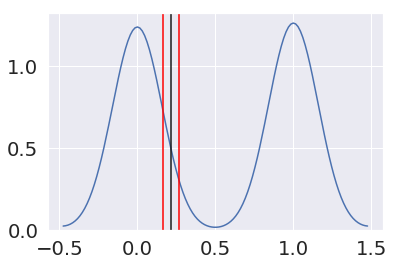

In [377]:
import seaborn as sns

array = df['el-salvador-aid'].dropna().to_numpy()
CI = confidence_interval(dem['el-salvador-aid'], 0.95)

sns.kdeplot(array)
plt.axvline(x = CI[1], color = 'red')
plt.axvline(x = CI[2], color = 'red')
plt.axvline(x = CI[0], color = 'k')

plt.show()


### 3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# Our sample's mean should be a reflection of the population's mean,
# plus our minus a margin of error based on our level of confidence;
# The Confidence Interval

## Chi-squared tests:

### 4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data

In [461]:
from scipy.stats import chisquare

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                ,header= None
                ,names = ['sepal length', 'sepal width', 
                          'petal length', 'petal width', 
                          'class']
                )
# Data Cleaning - None needed

# Measurements in cm
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


####   - By hand using Numpy

Failed

In [445]:
df['sepal length'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [462]:
bins = [4.0
       ,4.4
       ,4.9
       ,5.4
       ,5.9
       ,6.4
       ,6.9
       ,7
       ]

bin_labels = ['4.0 - 4.4'
             ,'4.5 - 4.9'
             ,'5.0 - 5.4'
             ,'5.5 - 5.9'
             ,'6.0 - 6.4'
             ,'6.5 - 6.9'
             ,'7.0+'
             ]

df['sepal length bins'] = pd.cut(df['sepal length'], bins, labels = bin_labels)
df['sepal length bins'].value_counts()

table = pd.crosstab(df['class'], df['sepal length bins'], margins=True)
table

sepal length bins,4.0 - 4.4,4.5 - 4.9,5.0 - 5.4,5.5 - 5.9,6.0 - 6.4,6.5 - 6.9,7.0+,All
class,,,,,,,,
Iris-setosa,4,16,25,5,0,0,0,50
Iris-versicolor,0,1,5,20,15,8,1,50
Iris-virginica,0,1,0,6,17,14,0,38
All,30,18,4,31,22,1,32,138


In [463]:
Iris_setosa_count     = table.iloc[0][:7].values
Iris_versicolor_count = table.iloc[1][:7].values
Iris_virginica_count  = table.iloc[2][:7].values

print(''
     ,Iris_setosa_count
     ,'\n'
     ,Iris_versicolor_count
     ,'\n'
     ,Iris_virginica_count
     )

 [ 4 16 25  5  0  0  0] 
 [ 0  1  5 20 15  8  1] 
 [ 0  1  0  6 17 14  0]


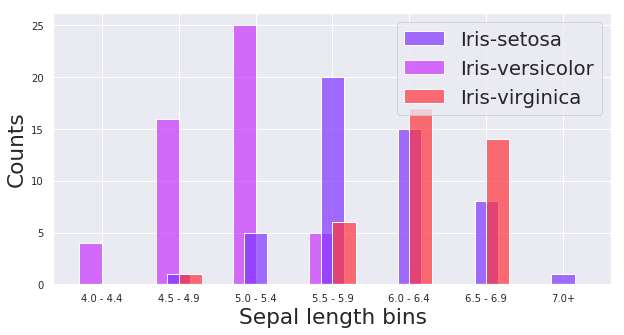

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)

p1 = plt.bar(bin_labels, Iris_setosa_count, -0.3, color='#ca33ffb3', align='edge')
p2 = plt.bar(bin_labels, Iris_versicolor_count, 0.3, color='#8033ffb3', align='center')
p3 = plt.bar(bin_labels, Iris_virginica_count, 0.3, color='#ff333cb3', align='edge')

plt.legend((p2[0], p1[0], p3[0]), ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'))

plt.xlabel('Sepal length bins')
plt.xticks(fontsize=10)
plt.ylabel('Counts')
plt.yticks(fontsize=10)

plt.show()

In [465]:
row_sums = table.iloc[:3, 7].values
col_sums = table.iloc[3, :7].values
total    = table.loc['All','All']

print(row_sums)
print(col_sums)
print(total)

[50 50 38]
[30 18  4 31 22  1 32]
138


In [496]:
# I've spent too much time on this already so I copied this over, but
# I have no idea what this is even meant to be doing, it's damn hard to read.
# I tried to make it more legible but it didn't really help.

expected = []
for number in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[number] / total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

# There's also something seriously wrong with this output.

(3, 7)
[[10.86956522  6.52173913  1.44927536 11.23188406  7.97101449  0.36231884
  11.5942029 ]
 [10.86956522  6.52173913  1.44927536 11.23188406  7.97101449  0.36231884
  11.5942029 ]
 [ 8.26086957  4.95652174  1.10144928  8.53623188  6.05797101  0.27536232
   8.8115942 ]]


In [495]:
observed = pd.crosstab(df['class'], df['sepal length bins']).values
print(observed.shape)
observed

(3, 7)


array([[ 4, 16, 25,  5,  0,  0,  0],
       [ 0,  1,  5, 20, 15,  8,  1],
       [ 0,  1,  0,  6, 17, 14,  0]])

In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
# Where the hell did they get 'p_value' ?
dof = (len(row_sums)-1) * (len(col_sums)-1)


In [490]:
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 109.85155348047537
P-value: 6.402579461512185e-18
Degrees of Freedom: 12
Expected: 
 [[10.86956522  6.52173913  1.44927536 11.23188406  7.97101449  0.36231884
  11.5942029 ]
 [10.86956522  6.52173913  1.44927536 11.23188406  7.97101449  0.36231884
  11.5942029 ]
 [ 8.26086957  4.95652174  1.10144928  8.53623188  6.05797101  0.27536232
   8.8115942 ]]


####   - In a single line using Scipy

In [0]:
# The code I wrote initially. I don't know how I'm supposed to get
# all four of those values from this seeing as it only outputs two values,
# but this is the best I could find at first. I think I'm really getting behind.
# chisq, pvalue = chi(df.drop(['sepal length bins', 'class'], axis=1)); print(chisq, '\n', pvalue)


chi_squared, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['class']
                                                                        ,df['sepal length bins']).values)


In [493]:
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 109.85155348047537
P-value: 6.402579461512185e-18
Degrees of Freedom: 12
Expected: 
 [[ 1.44927536  6.52173913 10.86956522 11.23188406 11.5942029   7.97101449
   0.36231884]
 [ 1.44927536  6.52173913 10.86956522 11.23188406 11.5942029   7.97101449
   0.36231884]
 [ 1.10144928  4.95652174  8.26086957  8.53623188  8.8115942   6.05797101
   0.27536232]]


# Conclusion

I'm not sure how, but there's some kind of issue in the code used in the lecture for doing the expected values, as it outputs a copy of the first line it passes, but I can't find any reason for it. Additionally, I can't get that to confirm what scipy gets for expected values at all. I've spent maybe 6 hours working on this thing in total and I'm at my limit. I haven't got a clue what the hell is going on in this lesson.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)